In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Загружаю файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('/Users/ivanrybakov/Downloads/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Видим, что из 10 переменных датафрейма 8 относятся к количественным переменным (типы float и int), а 2 последних (department и salary) к категориальным переменных

#Cчитаю основные статистики для количественных переменных в dataframe
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
qnty = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']

In [5]:
df[qnty].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df[qnty].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


Видим, что распределение переменной average_montly_hours' бимодально

Видим, что в количественных данных отсутствуют пропуски, значения не выбиваются из адекватного диапазона

#Cчитаю основные статистики для категориальных переменных в dataframe
(количество значений, количество уникальных значений, наиболее частое встречающееся значение, распределение по уникальным значениям)

In [9]:
qlty = ['department','salary']

In [10]:
df[qlty].describe()

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


Видим, что в выборке наиболее часто встречаются сотрудники из отдела продаж и сотрудники с низкой зарплатой

#Cчитаю, сколько сотрудников работает в каждом департаменте

In [11]:
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [ ]:
В основном сотрудники в опросе работали в продажах, технической сфере и клиентской поддержке (sales, technical, support)

In [12]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

#Рассчитываю и визуализирую корреляционную матрицу для
количественных переменных.
Определяю две самые скоррелированные и две наименее
скоррелированные переменные.

In [13]:
df_corr = df[qnty].corr(method="pearson")
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

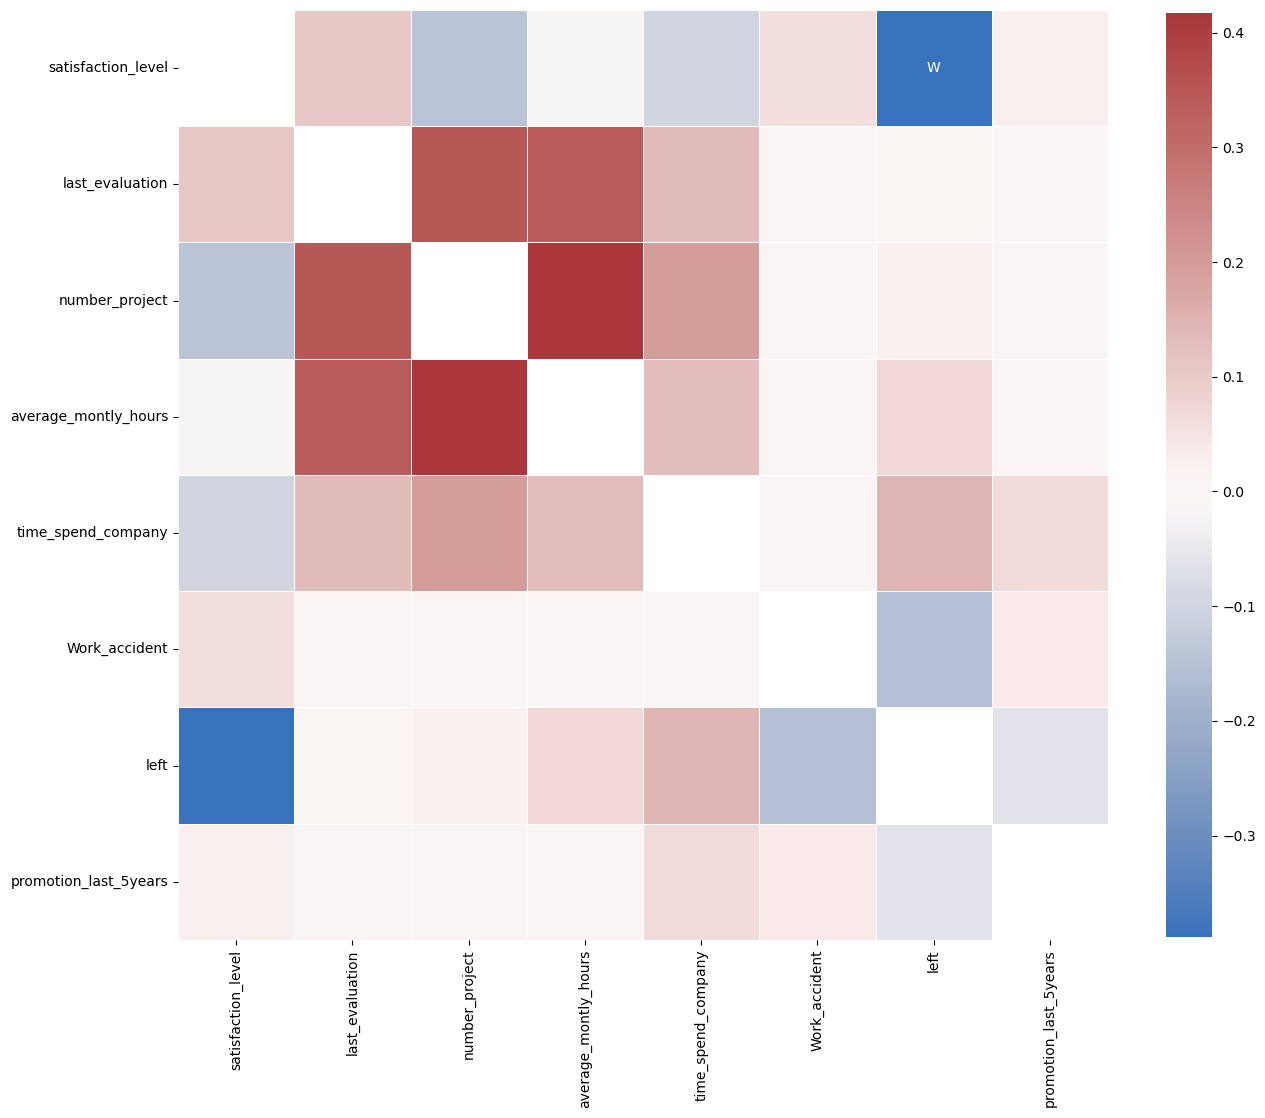

In [14]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

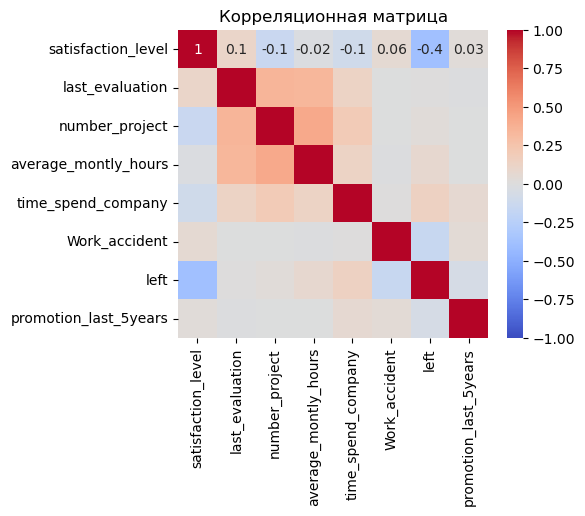

In [15]:
plt.figure(figsize=(5, 4))
sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1, center= 0 ,cmap='coolwarm',fmt='.1g')
plt.title('Корреляционная матрица')
plt.show()

In [16]:
corrs = [(df_corr.iloc[row,col], qnty[row], qnty[col]) for row in range(0, 7) for col in range(row)]

In [17]:
corrs

[(0.10502121397148649, 'last_evaluation', 'satisfaction_level'),
 (-0.14296958603690102, 'number_project', 'satisfaction_level'),
 (0.3493325885162623, 'number_project', 'last_evaluation'),
 (-0.020048113219472665, 'average_montly_hours', 'satisfaction_level'),
 (0.3397417998383593, 'average_montly_hours', 'last_evaluation'),
 (0.41721063440178, 'average_montly_hours', 'number_project'),
 (-0.1008660725779667, 'time_spend_company', 'satisfaction_level'),
 (0.1315907224476586, 'time_spend_company', 'last_evaluation'),
 (0.19678589126379054, 'time_spend_company', 'number_project'),
 (0.1277549103618603, 'time_spend_company', 'average_montly_hours'),
 (0.058697241051972965, 'Work_accident', 'satisfaction_level'),
 (-0.007104288519603831, 'Work_accident', 'last_evaluation'),
 (-0.004740547719769693, 'Work_accident', 'number_project'),
 (-0.010142888185802982, 'Work_accident', 'average_montly_hours'),
 (0.0021204180967097186, 'Work_accident', 'time_spend_company'),
 (-0.38837498342411597, '

In [18]:
max2 = sorted(corrs, key=lambda x: abs(x[0]), reverse=True)[:2]
print(max2)

[(0.41721063440178, 'average_montly_hours', 'number_project'), (-0.38837498342411597, 'left', 'satisfaction_level')]


Видим, что 2 самые скоррелированные переменные - это
1) количество выполненных за время работы проектов
И среднее количество часов на рабочем месте в месяц
2) уровень удовлетворенности сотрудником работой и факт увольнения (отрицательная корреляция)

In [19]:
min2 = sorted(corrs, key=lambda x: 0 - abs(x[0]), reverse=True)[:2]
print(min2)

[(0.0021204180967097186, 'Work_accident', 'time_spend_company'), (-0.004740547719769693, 'Work_accident', 'number_project')]


Видим, что 2 самые некоррелированные переменные - это
1) факт несчастных случаев на работе и количество лет в компании
2) факт несчастных случаев на работе и количество выполненных проектов

#Показать распределение сотрудников по зарплатам

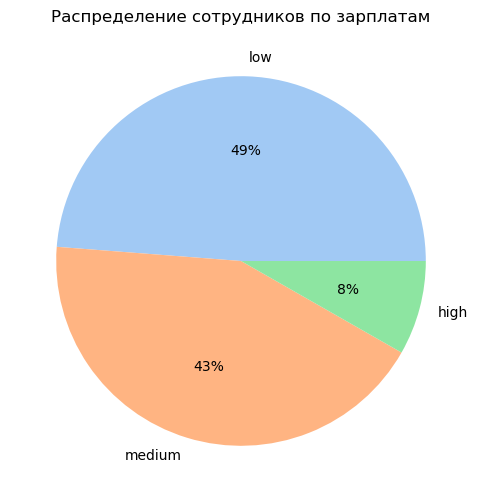

In [20]:
plt.figure(figsize=[6, 6])

data = df['salary'].value_counts(normalize=True)

labels = ["low", "medium", "high"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Распределение сотрудников по зарплатам")
plt.show()

Видим, что сотрудников с низкой и средней зарплатой примерно поровну, в то время как людей с высоким доходом в выборке значительно меньше

#Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

Сначала вычислим распределение для отдельного департамента

In [21]:
df_1 = df[df['department'] == 'sales']

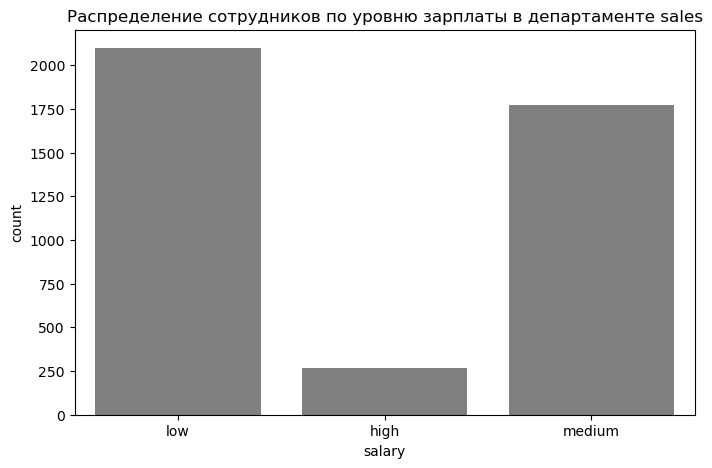

In [22]:
plt.figure(figsize=[8,5])
sns.countplot(data=df_1, x="salary", order=['low', 'high', 'medium'], color="grey")
plt.title("Распределение сотрудников по уровню зарплаты в департаменте sales")
plt.show()

Видим, что в продажах в основном работают люди с низкой зарплатой, при этом доля высокооплачиваемых сотрудников небольшая. Проверим, выполняется ли данное условие для всех департаментов

Построим графики распределений по уровню зарплат для всех департаментов

In [23]:
list(df['department'].unique())

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

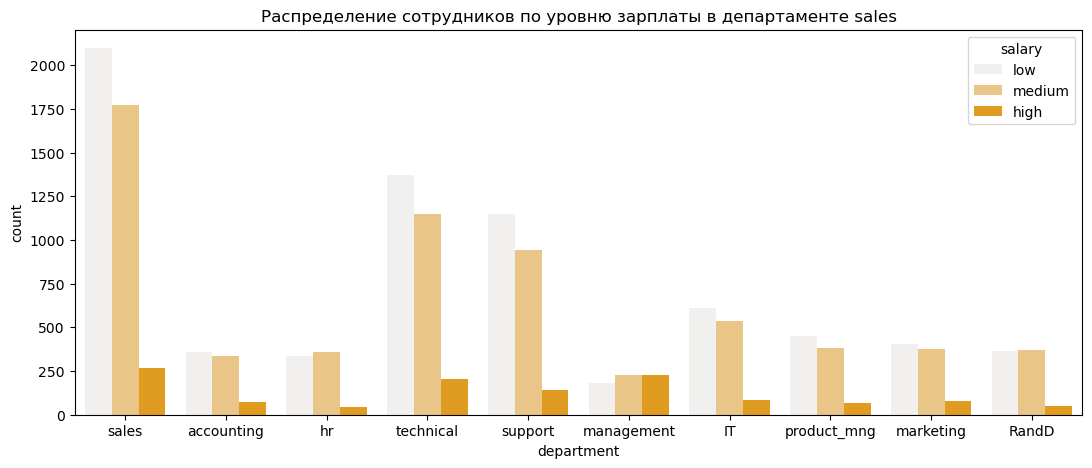

In [24]:
plt.figure(figsize=[13,5])
sns.countplot(data=df, x='department', hue = "salary", order=['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], color="orange")
plt.title("Распределение сотрудников по уровню зарплаты в департаменте sales")
plt.show()

Видим, что распределения зарплат отличаются в зависимости от департамента:
1) Распределения департаментов sales, technical,support, IT, product_mng схожи - преобладают сотрудники с низкой зарплатой, далее с небольшим отставаниям идут специалисты со средней зарплатой, доля высокооплачиваемых работников существенно ниже
2) Распределения департаментов accounting, HR, marketing, RandD схожи тем, что в отличие от распределений в п.1 доля сотрудников с низкой и средней зарплатой практически одинакова, доля низкооплачиваемых специалистов остается невысокой
3) Департамент management отличается от всех остальных - в нем преобладают сотрудников со средней и высокой заработной платой

#Проверяю гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
окладом

Сначала сформируем выборки с данными по рабочим часам для 2-х категория в рамках проведения теста

In [25]:
df_1 = df[df['salary'] == 'high']['average_montly_hours']
df_2 = df[df['salary'] == 'low']['average_montly_hours']

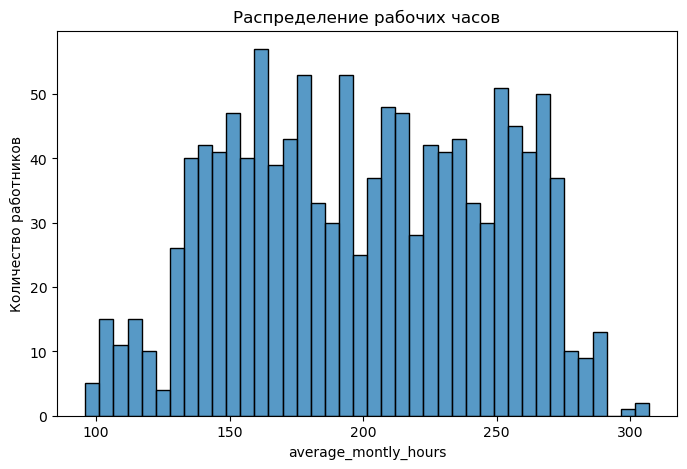

In [26]:
plt.figure(figsize=[8,5])
sns.histplot(data=df_1, bins=40)
plt.title("Распределение рабочих часов")
plt.ylabel("Количество работников")
plt.show()

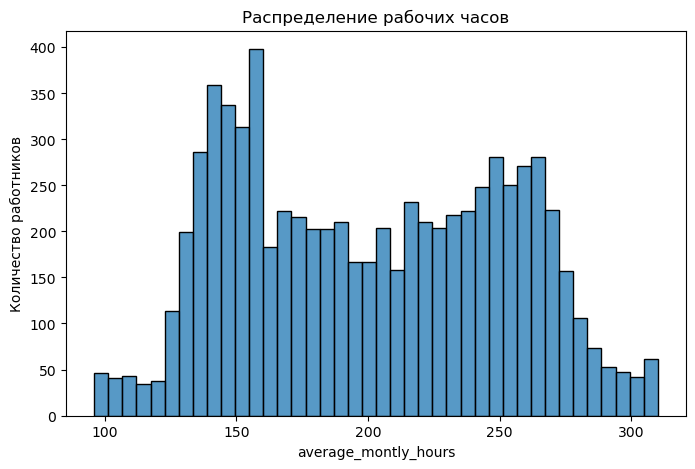

In [27]:
plt.figure(figsize=[8,5])
sns.histplot(data=df_2, bins=40)
plt.title("Распределение рабочих часов")
plt.ylabel("Количество работников")
plt.show()

Использую функцию для проверки нормальности, написанную в одном из предыдущих дз

In [28]:
def check_normality(data):
    #
    stat,p = st.shapiro(data)
    #
    if p <= 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
        print(f"p-value = {p:.5f}")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
        print(f"p-value = {p:.5f}")

In [29]:
check_normality(df_1)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
p-value = 0.00000


In [30]:
check_normality(df_2)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
p-value = 0.00000


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Видим, что предположение о нормальности не выполняется, поэтому для проверки гипотезы можем использовать тест Манна-Уитни

In [31]:
m_stat, m_p = st.mannwhitneyu(df_1, df_2)

print(f"Статистика = {m_stat:.5f}, m_p = {m_p:.5f}")

if m_p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')
    print(f"p-value = {m_p:.5f}")

Статистика = 4507096.50000, m_p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Вывод: не обнаружено статистически значимого свидетельства,
что люди с высоким окладом проводят на работе больше времени, чем люди с низким окладом

Рассчитываю показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [32]:
df_left = df[df['left'] == 1]

In [33]:
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
df_non_left = df[df['left'] == 0]

In [35]:
df_non_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [36]:
left_mean_satisfaction = df_left['satisfaction_level'].mean()
print(f" Средний уровень удовлетворенности работой уволившихся сотрудников : {left_mean_satisfaction }")
non_left_mean_satisfaction = df_non_left['satisfaction_level'].mean()
print(f" Средний уровень удовлетворенности работой неуволившихся сотрудников : {non_left_mean_satisfaction }")

 Средний уровень удовлетворенности работой уволившихся сотрудников : 0.4400980117614114
 Средний уровень удовлетворенности работой неуволившихся сотрудников : 0.666809590479524


Видим, что прослеживаются явные различия в уровне удовлетворенности работой среди уволившихся и оставшихся сотрудников. Уволившиеся сотрудники значительно меньше удовлетворены работой, что логично

In [37]:
left_mean_num_projects = df_left['number_project'].mean()
print(f" Среднее количество выполненных проектов уволившихся сотрудников : {left_mean_num_projects}")
non_left_mean_num_projects = df_non_left['number_project'].mean()
print(f" Среднее количество выполненных проектов неуволившихся сотрудников : {non_left_mean_num_projects}")

 Среднее количество выполненных проектов уволившихся сотрудников : 3.8555026603192384
 Среднее количество выполненных проектов неуволившихся сотрудников : 3.786664333216661


Видим, что количество проектов примерно одинаковое для обоих категорий сотрудников

In [38]:
left_promotion = df_left['promotion_last_5years'].mean()
print(f" Доля повышений за последние 5 лет среди уволившихся сотрудников : {left_promotion}")
non_left_promotion = df_non_left['promotion_last_5years'].mean()
print(f" Доля повышений за последние 5 лет среди неуволившихся сотрудников : {non_left_promotion}")

 Доля повышений за последние 5 лет среди уволившихся сотрудников : 0.005320638476617194
 Доля повышений за последние 5 лет среди неуволившихся сотрудников : 0.026251312565628283


Видим, что доли значительно различаются между группами, уволившихся сотрудников практически не повышали,
в то время как процент повышений среди неуволившихся значительно выше. Результат можно объяснить тем, что 
после повышения у сотрудника появляется больше лояльности к текущей компании

#Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
dependent_variables = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [81]:
target_variable = df['left']

In [82]:
dependent_variables.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [98]:
x = np.array(dependent_variables)

In [99]:
y = np.array(target_variable)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [101]:
len(y_train)

11249

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
lda = LinearDiscriminantAnalysis()

In [104]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [105]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [106]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [107]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

Видим, что модель обладает высокой точностью прогнозов - качество модели хорошее